In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
def random_batch(skip_grams):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)

    for i in random_index:
        random_inputs.append(skip_grams[i][0])  # target
        random_labels.append(skip_grams[i][1])  # context word

    return random_inputs, random_labels

In [3]:
sentences = """During my second month of nursing school, our professor gave us a pop quiz.
I was a conscientious student and had breezed through the questions, until I read the last one:
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke.""".split()

In [4]:
batch_size = 2 # mini-batch size
embedding_size = 10 # embedding size

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

voc_size = len(word_list)

def skipgram(sentences, window_size=1):
    skip_grams = []
    for i in range(window_size, len(word_sequence) - window_size):
        target = word_sequence[i]
        context = [word_sequence[i - window_size], word_sequence[i + window_size]]
        for w in context:
            skip_grams.append([target, w])

    return skip_grams

In [5]:
skipgram(word_sequence)[0:2]

[['my', 'During'], ['my', 'second']]

In [6]:
class skipgramModel(nn.Module):
    def __init__(self):
        super(skipgramModel, self).__init__()
        self.embedding = nn.Embedding(voc_size, embedding_size)
        self.W = nn.Linear(embedding_size, embedding_size, bias=False)
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)

    def forward(self, X):
        embeddings = self.embedding(X)
        hidden_layer = nn.functional.relu(self.W(embeddings))
        output_layer = self.WT(hidden_layer)
        return output_layer

    def get_word_emdedding(self, word):
        word = torch.tensor([word_dict[word]])
        return self.embedding(word).view(1,-1)

In [7]:
model = skipgramModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [8]:
for epoch in tqdm(range(150000), total=len(skipgram(word_sequence))):
    input_batch, target_batch = random_batch(skipgram(word_sequence))
    input_batch = torch.LongTensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 10000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward(retain_graph=True)
    optimizer.step()

  0%|          | 0/96 [00:00<?, ?it/s]


ValueError: too many dimensions 'str'

In [ ]:
def Skipgram_test(test_data, model):
    correct_ct = 0

    for i in range(len(test_data)):
        input_batch, target_batch = random_batch(test_data)
        input_batch = torch.LongTensor(input_batch)
        target_batch = torch.LongTensor(target_batch)

        model.zero_grad()
        _, predicted = torch.max(model(input_batch), 1)




        if predicted[0] == target_batch[0]:
                correct_ct += 1

    print('Accuracy: {:.1f}% ({:d}/{:d})'.format(correct_ct/len(test_data)*100, correct_ct, len(test_data)))

In [ ]:
Skipgram_test(skipgram(word_sequence), model)

Accuracy: 35.4% (34/96)


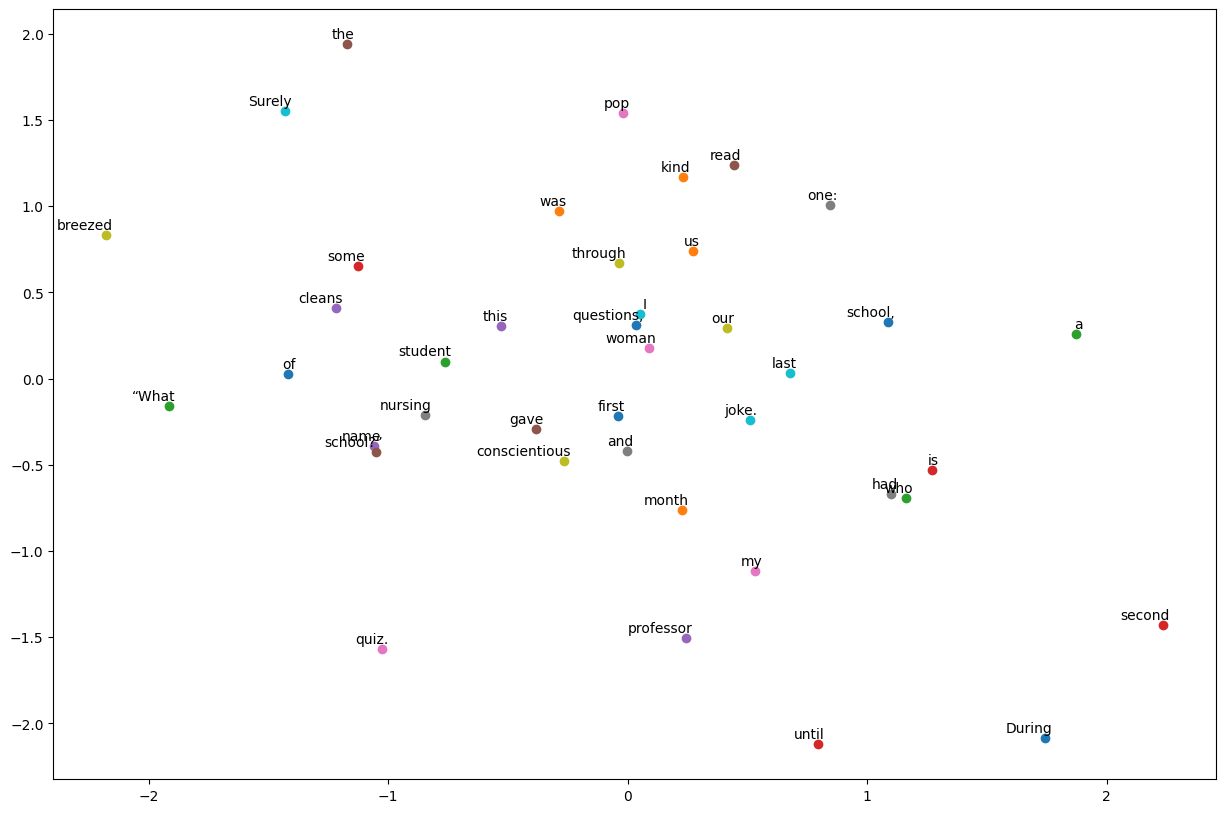

In [9]:
plt.figure(figsize=(15,10))
for w in word_list:
    x = model.get_word_emdedding(w).detach().data.numpy()[0][0]
    y = model.get_word_emdedding(w).detach().data.numpy()[0][1]
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [ ]:
pred = "Surely".split()

In [ ]:
word_dict_inverse = {i:w for w, i in word_dict.items()}


In [ ]:
model_pred = []
e = 0
model_pred.append(pred[0])

while e<6:
    word = word_dict_inverse[torch.argmax(model(torch.LongTensor([word_dict[model_pred[-1]]]))).item()]
    model_pred.append(word)
    e+=1

' '.join(model_pred)

'Surely was dark-haired in I how 50s,'